<a href="https://colab.research.google.com/github/LidiyaIshchenko/Project-4/blob/main/Copy_of_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'project-4-computer-vision-1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4373687%2F7509655%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240206%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240206T072657Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8b7a520526eb8222e07cddee62abcdd7fb69494aa67c0caa61205f5550d59d16129bea54c3570cbe673c8864952b0d433f7511f0560b39181a4ea54e578570afb18f96c7eea7fbe3b5c3d4ef90d6b31b62ab07b59b49da9320b46b4a7bbb4b8e4713a6c4d65c4da176932399932737f93a65148662cddbd3647b58ae2f6dc049af070c1b2e023c6d03373bc71c040c589bc9439a06dffbead21e3904957ebed99e70fefaa839d9d770a887671fbf644e57a160ce50c5e4ae5f6b3387be9e2a5796006a73a1e7a13b8a57291a8534dcb3e3818427ba9adf9e3fc6e5a892e77189dc32291bfac248768a6d72bd4328d4e3112e1405080691ecee72bded104001ca'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 150481049 bytes downloaded
Downloaded and uncompressed: project-4-computer-vision-1
Data source import complete.


# Прекод

# Сборный проект-4
### Описание проекта

Вы работаете в фотохостинге для профессиональных фотографов « (“With Sense”).
Ваши пользователи размещают свои фотографии на хостинге и сопрСо Смыслом»овождают их полным описанием: указывают место съёмок, модель камеры и т. д.
 Отличительная особенность сервиса — описание: его может предоставить не только тот, кто размещает фотографию, но и другие пользователи портала.
Описание выглядит так:   
⎢ A hiker poses for a picture in front of stunning mountains and clouds.
Ваш отдел занимается экспериментом по разработке поиска референсных фотографий для фотографов. Суть поиска заключается в следующем: пользователь сервиса вводит описание нужной сцены. Например, такое:   
⎢ A man is crossing a mountain pass on a metal bridge.  
Сервис выводит несколько фотографий с такой же или похожей сценой.  
Чтобы эксперимент получил право на жизнь, нужно защитить его перед руководителем компании. Для защиты необходимо презентовать так называемый PoC (Proof of Concept, Проверка концепции) — продемонстрировать, что такой проект практически осуществим. Вам поручено разработать демонстрационную версию поиска изображений по запросу.   
Для демонстрационной версии нужно выбрать лучшую  модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — и покажет, насколько текст и картинка подходят друг другу.
На основе лучшей модели можно будет собрать предварительную версию продукта, которую вы покажете руководителю компании.    

### Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

**Юридические ограничения**   
В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет.   
В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:   
⎢ This image is unavailable in your country in compliance with local laws.   
Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому необходимо очистить данные от проблемного контента. Во время тестирования модели при появлении в запросе “вредного” контента должен отображаться дисклеймер.   

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


#### Исследовательский анализ данных

In [ ]:
#%capture
#%pip install numpy
#%pip install fsspec
#%pip install seaborn

In [ ]:
%%capture
%pip install nltk
#%pip install spacy
!pip install -q spacy keras_nlp sentence_transformers
!python -m spacy download en_core_web_sm
%pip install keras --upgrade

In [ ]:
%%capture
%pip install tensorflow
#%pip install -q torchvision
#%pip install plotly

In [ ]:
#nltk.download('omw-1.4')
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

In [ ]:
%%capture
!pip install git+https://github.com/UKPLab/sentence-transformers.git
!pip install git+https://github.com/Muennighoff/sentence-transformers.git@sgpt_poolings_specb

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

import nltk
import re
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy

from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from tensorflow.keras.applications.resnet import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,BatchNormalization, Reshape, RepeatVector, LSTM, Dropout

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.resnet50 import ResNet50

import keras_nlp
#from sentence_transformers import SentenceTransformer, util
import glob
import torch.nn as nn
from math import ceil

2024-02-06 06:25:19.408891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 06:25:19.409036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 06:25:19.416629: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using TensorFlow backend


In [ ]:
PATH = '/kaggle/input/project-4-computer-vision-1/to_upload'
PATH_images = '/kaggle/input/project-4-computer-vision-1/to_upload/train_images'
#снимем ограничения на ширину  выводимого текстового столбца
pd.set_option('display.max_colwidth', None)

In [ ]:
# Распакуем наши данные

df = pd.read_csv(os.path.join(PATH, 'train_dataset.csv'))
df_crown = pd.read_csv(os.path.join(PATH, 'CrowdAnnotations.tsv'),sep='\t',
                       names=["image","query_id",'probability_crown','positive','negative'])

In [ ]:
df_exp = pd.read_csv(os.path.join(PATH, 'ExpertAnnotations.tsv'),sep='\t',
                       names=['image','query_id','score_1','score_2','score_3'])

In [ ]:
test_queries = pd.read_csv(os.path.join(PATH, 'test_queries.csv'), sep='|', index_col=0)
test_images = pd.read_csv(os.path.join(PATH, 'test_images.csv'), sep='|')

In [ ]:
df.head(5)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [ ]:
df.describe()

,image,query_id,query_text
count,5822,5822,5822
unique,1000,977,977
top,3364151356_eecd07a23e.jpg,2600867924_cd502fc911.jpg#2,"Two dogs , one brown and white and one black and white , run on a field ."
freq,10,34,34


В датасете присутствует 1000 уникальных фотографий

In [ ]:
df_crown.head(10)

,image,query_id,probability_crown,positive,negative
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.000000,0,3
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,0.000000,0,3
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333,1,2
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,0.000000,0,3
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,0.000000,0,3


In [ ]:
df_crown.describe()

,probability_crown,positive,negative
count,47830.000000,47830.000000,47830.000000
mean,0.068786,0.208488,2.820155
std,0.207532,0.628898,0.656676
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,3.000000
75%,0.000000,0.000000,3.000000
max,1.000000,5.000000,6.000000


In [ ]:
df_exp.head()

,image,query_id,score_1,score_2,score_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


In [ ]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   score_1   5822 non-null   int64 
 3   score_2   5822 non-null   int64 
 4   score_3   5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


In [ ]:
df_exp.describe()

,score_1,score_2,score_3
count,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999
std,0.787084,0.856222,0.904087
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000


In [ ]:
# Выведем картинки, который предлагаются нам для изучения:
data_train_image = list(data_train['image'].sample(10))

fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    image = Image.open(Path(PATH, 'train_images', data_train_image[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Описание содержится только в одной таблице - df   
Переведем текст в формат

In [ ]:
#создадим функцию для обработки текстового столбца
def clear_text(text):
    text = text.lower()
    text=re.sub(r'[^a-zA-Z]', ' ', text) # оставляем только буквенные символы
    text=" ".join(text.split())
    return text

In [ ]:
#очистим столбец текстовый:
df['query_text'] = df['query_text'].apply(clear_text)

Проведем лематизацию

In [ ]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [ ]:
def spacy(sentence):
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc])

df['query_text'] = df['query_text'].apply(spacy)

Создадим столбец с количеством краудсортированных оценок для кажой позиции.     
Создадим столбец с вероятностью отрицательной оценки в тесте

In [ ]:
df_crown['people']=df_crown['positive']+df_crown['negative']
df_crown['probability_negative']=df_crown['negative']/df_crown['people']

In [ ]:
df_crown.head(10)

,image,query_id,probability_crown,positive,negative,people,probability_negative
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0,3,0.000000
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3,3,1.000000
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3,3,1.000000
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3,3,1.000000
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3,3,1.000000
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.000000,0,3,3,1.000000
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,0.000000,0,3,3,1.000000
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333,1,2,3,0.666667
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,0.000000,0,3,3,1.000000
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,0.000000,0,3,3,1.000000


За каждую пару изображение+описание проголосовали от 3 до 6 человек

Проверим данные на количество противоречивых оценок экспертов

In [ ]:
df_exp.query('score_1 != score_2  != score_3').count()

image       126
query_id    126
score_1     126
score_2     126
score_3     126
dtype: int64

In [ ]:
index_names=df_exp[(df_exp['score_1']!=df_exp['score_2']) & (df_exp['score_2']!=df_exp['score_3'])& (df_exp['score_1']!=df_exp['score_3'])].index

In [ ]:
print('Процент разнородных отзывов экспертов {:.2%}'.format(len(index_names)/len(df_exp)))

Процент разнородных отзывов экспертов 2.16%


126 строчек содержит противоречивые отзывы экспертов,ни одна оценка экспертов не равна друг другу, от неуверенности  в том, что изображение соответствует описанию, до полного согласия, что объект соответствует описанию.   
Удалим эти срочки из датафрейма, ввиду того, что это могут быть стохастические ошибки. И их количество невелико, менее 3%

In [ ]:
df_exp.drop(index_names,inplace=True)

In [ ]:
#Создадим столбец с агрегированной оценкой экспертов, применим метод - медианы
def agr_data(row):

    row['agr_expert'] = int(np.median(row['score_1':'score_3']))

    return row

df_exp = df_exp.apply(agr_data, axis=1)
df_exp

,image,query_id,score_1,score_2,score_3,agr_expert
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1
...,...,...,...,...,...,...
5817,997722733_0cb5439472.jpg,2981702521_2459f2c1c4.jpg#2,1,1,1,1
5818,997722733_0cb5439472.jpg,2985679744_75a7102aab.jpg#2,1,1,1,1
5819,997722733_0cb5439472.jpg,3150742439_b8a352e1e0.jpg#2,1,1,2,1
5820,997722733_0cb5439472.jpg,3375070563_3c290a7991.jpg#2,1,1,1,1


Создадим столбец с перекодированными оценками экспертов:  
1 - 0 соотвествия пары изображение+описание   
2 -0,35 соотвествие пары изображение+описание   
3 -0,7 соотвествие пары изображение+описание  
4 -1 полное соотвествие пары изображение+описание   

In [ ]:
# Напишем "бейслайн", который разделяет данные относительно значения agr_expert, с учётом вышеперечисленной вероятности соответствия

def fraction(row):

    if row['agr_expert'] ==1:
        return 0
    elif row['agr_expert'] ==2:
        return 0.35
    elif row['agr_expert'] ==3:
        return 0.7
    return 1.0

In [ ]:
df_exp['positive_exp']=df_exp[['agr_expert']].apply(fraction, axis=1)

In [ ]:
df_exp.head(5)

,image,query_id,score_1,score_2,score_3,agr_expert,positive_exp
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1,0.00
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1,0.00
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1,0.00
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2,0.35
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1,0.00


In [ ]:
df_exp['query_id'].value_counts()

query_id
2600867924_cd502fc911.jpg#2    33
1554713437_61b64527dd.jpg#2    27
2522297487_57edf117f7.jpg#2    24
3254817653_632e840423.jpg#2    22
1536774449_e16b1b6382.jpg#2    21
                               ..
308487515_7852928f90.jpg#2      1
476759700_8911f087f8.jpg#2      1
424779662_568f9606d0.jpg#2      1
3138399980_d6ab8b2272.jpg#2     1
2292406847_f366350600.jpg#2     1
Name: count, Length: 977, dtype: int64

In [ ]:
print('Количество явных дубликатов -', df_exp.duplicated().sum())

Количество явных дубликатов - 0


In [ ]:
print('Количество явных дубликатов -', df.duplicated().sum())

Количество явных дубликатов - 0


Создадим сводную таблицу, содержащую данные для обучения

In [ ]:
data=df.merge(df_crown[['image','query_id','probability_crown']],
                         on=['image','query_id'], how='outer')

In [ ]:
data.head(4)

,image,query_id,query_text,probability_crown
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,NaN,1.0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,NaN,0.0
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,NaN,0.0
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,NaN,0.0


In [ ]:
df_train=data.merge(df_exp[['image','query_id','positive_exp']],
                         on=['image','query_id'], how='outer')

In [ ]:
df_train.head()

,image,query_id,query_text,probability_crown,positive_exp
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,NaN,1.0,NaN
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,NaN,0.0,NaN
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,NaN,0.0,NaN
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,NaN,0.0,NaN
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,NaN,0.0,NaN


In [ ]:
fig = px.histogram(
    df_train, x='positive_exp',
    barmode='group',
    title='Доля экспертов, подтвердивших, что описание соответствует изображению',
    histfunc='count',
    category_orders={
        'collision_damage': ['0', '0.35', '0.7', '1']
    }
)
fig.show()

In [ ]:
fig = px.histogram(
    df_train, x='probability_crown',
    barmode='group',
    title='Доля людей на краудсортинге, подтвердивших, что описание соответствует изображению',
    histfunc='count'
)
fig.show()

На обоих диаграммах  видно, что качество соответствия описания картинок и самого изображения низкое, больше половины экспертов оценили, что картинка  и описание полностью не соответствуют друг другу

Описание текста приводится в небольшой части ячеек

In [ ]:
print('Уникальных изображений в трейне:', len(set(df_train['image'])))
print('Уникальных текстовых описаний в трейне:', len(set(df_train['query_text'])))

Уникальных изображений в трейне: 1000
Уникальных текстовых описаний в трейне: 978


In [ ]:
df_train.isna().sum()

image                    0
query_id                 0
query_text           45501
probability_crown     3493
positive_exp         45627
dtype: int64

Заполним пропуски в описании после объединения таблиц.

In [ ]:
to_fill = df_train[df_train['query_text'].notna()]
def fill_text(row) -> object:

    '''заполняем пропуски текстов в тренировочном наборе данных'''

    if pd.isnull(row['query_text']):
        texts = to_fill[to_fill['query_id'] == row['query_id']]['query_text']
        if len(texts) > 0:
            row['query_text'] = texts.iloc[0]

    return row

df_train = df_train.apply(fill_text, axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51323 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              51323 non-null  object 
 1   query_id           51323 non-null  object 
 2   query_text         50214 non-null  object 
 3   probability_crown  47830 non-null  float64
 4   positive_exp       5696 non-null   float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


Удалим строки, которые не удалось заполнить текстовыми данными

In [ ]:
# Удалим NaN значения для описания столбцов
df_train=df_train.query('query_text.notna()', engine="python")
display(df_train.head(10))
df_train.info()

,image,query_id,query_text,probability_crown,positive_exp
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,a woman be signal be to traffic as see from behind,1.000000,NaN
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,a boy in glass be wear a red shirt,0.000000,NaN
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,a young boy hold onto a blue handle on a pier,0.000000,NaN
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,a woman wear black clothe a purple scarf and a pink hat be ride a bike,0.000000,NaN
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,an old woman with blond hair ride a bicycle down the street,0.000000,NaN
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,a woman wear a white glove peer over the crowd,0.000000,NaN
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,a man take a picture with a silver camera,0.000000,NaN
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,a woman cross the street near a man who be on his cellphone,0.333333,NaN
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,a man wear a black shirt and baseball cap smile,0.000000,NaN
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,a woman wear sunglass and a black coat as she walk,0.000000,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 50214 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              50214 non-null  object 
 1   query_id           50214 non-null  object 
 2   query_text         50214 non-null  object 
 3   probability_crown  46721 non-null  float64
 4   positive_exp       5696 non-null   float64
dtypes: float64(2), object(3)
memory usage: 2.3+ MB


Для обучения модели осталась выборка из 50 214 строк.   
Выведем на экран пример изображений людей

Создадим агрегированную оценку экспертов и краудсортиргонвой платформы

In [ ]:
def calc_res(row):
    if pd.isna(row['positive_exp']) and pd.isna(row['probability_crown']):
        return np.nan
    elif pd.isna(row['positive_exp']):
        return row['probability_crown']
    elif pd.isna(row['probability_crown']):
        return row['positive_exp']
    else:
        return row['positive_exp']*0.6 + row['probability_crown']*0.4

df_train['res_score'] = df_train.apply(calc_res, axis=1)
df_train.head()

,image,query_id,query_text,probability_crown,positive_exp,res_score
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,a woman be signal be to traffic as see from behind,1.0,NaN,1.0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,a boy in glass be wear a red shirt,0.0,NaN,0.0
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,a young boy hold onto a blue handle on a pier,0.0,NaN,0.0
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,a woman wear black clothe a purple scarf and a pink hat be ride a bike,0.0,NaN,0.0
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,an old woman with blond hair ride a bicycle down the street,0.0,NaN,0.0


In [ ]:
df_train = df_train.drop(['probability_crown', 'positive_exp'], axis=1)

In [ ]:
df_train.head(10)

,image,query_id,query_text,res_score,kids_list
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,a woman be signal be to traffic as see from behind,1.000000,False
1,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,a woman wear black clothe a purple scarf and a pink hat be ride a bike,0.000000,False
2,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,an old woman with blond hair ride a bicycle down the street,0.000000,False
3,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,a woman wear a white glove peer over the crowd,0.000000,False
4,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,a man take a picture with a silver camera,0.000000,False
5,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,a woman cross the street near a man who be on his cellphone,0.333333,False
6,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,a man wear a black shirt and baseball cap smile,0.000000,False
7,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,a woman wear sunglass and a black coat as she walk,0.000000,False
8,1056338697_4f7d7ce270.jpg,2623930900_b9df917b82.jpg#2,a man with disheveled hair and facial hair in a crowd of people be smile,0.000000,False
9,1056338697_4f7d7ce270.jpg,2644430445_47c985a2ee.jpg#2,a woman in a red shirt hold a cellphone,0.000000,False


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_gen_flow = datagen.flow_from_dataframe(
        dataframe=df_train,
        directory=Path(os.path.join(PATH, 'train_images')),
        x_col='image',
        y_col='positive_exp',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        seed=12345)

# Генерируем и отображаем изображения и их оценки
features, target = train_gen_flow.next()

Found 50214 validated image filenames.


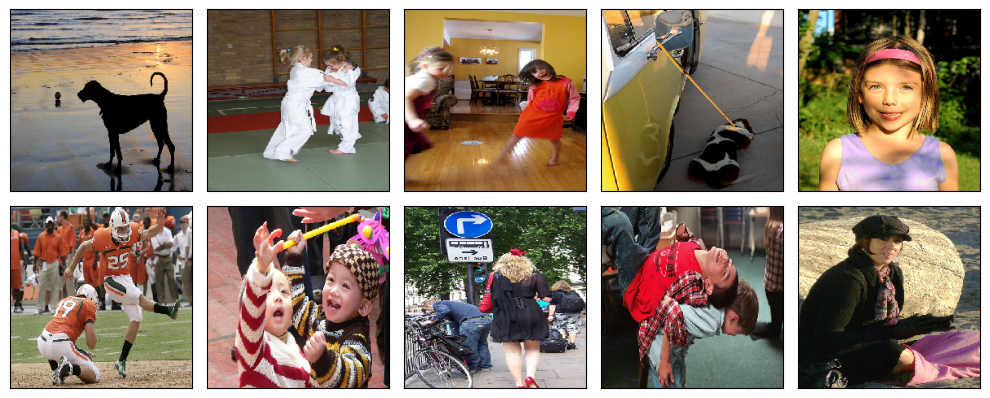

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Создадим список слов, которые  могут в описании указывать на изображение ребенка.

In [ ]:
stop_words = ['child', 'children', 'baby', 'babies', 'girl', 'boy', 'girls', 'boys', 'kid', 'kids', 'juvenile', 'youngster',
             'minor', 'minors', 'teen', 'teens', 'teenager', 'teenagers', 'underage', 'infant', 'infants', 'toddler', 'toddlers']

In [ ]:
def check_kids(row):
    text = row.loc['query_text']
    for word in text.split():
        if word in stop_words:
            return True
    return False

In [ ]:
# (добавляем столбец) создаем список/таблицу с признаком наличия "запрещенных" слов в тексте
df_train['kids_list'] = df_train.apply(check_kids, axis=1)

In [ ]:
display(df_train.head(10))

,image,query_id,query_text,res_score,kids_list
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,a woman be signal be to traffic as see from behind,1.000000,False
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,a boy in glass be wear a red shirt,0.000000,True
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,a young boy hold onto a blue handle on a pier,0.000000,True
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,a woman wear black clothe a purple scarf and a pink hat be ride a bike,0.000000,False
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,an old woman with blond hair ride a bicycle down the street,0.000000,False
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,a woman wear a white glove peer over the crowd,0.000000,False
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,a man take a picture with a silver camera,0.000000,False
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,a woman cross the street near a man who be on his cellphone,0.333333,False
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,a man wear a black shirt and baseball cap smile,0.000000,False
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,a woman wear sunglass and a black coat as she walk,0.000000,False


Видим, что в тексте присутсвует описание детей, очистим тренировочную базу данных

In [ ]:
def spl(text):
    return text[:text.find('#')]

In [ ]:
num_forb_images = len(df_train[df_train['kids_list']==True]['query_id'].apply(spl).unique())

In [ ]:
num_forb_images

290

В тренировочных данных мы нашли 290 изображений с детьми. Создадим новую таблицу, в которую войдут только те строки, которые не содержат детские изображения.

In [ ]:
# Фильтрация строк, где kids_list = True
df_train = df_train[df_train['kids_list'] != True].reset_index(drop=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35902 entries, 0 to 35901
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       35902 non-null  object 
 1   query_id    35902 non-null  object 
 2   query_text  35902 non-null  object 
 3   res_score   35865 non-null  float64
 4   kids_list   35902 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df_train

,image,query_id,query_text,res_score,kids_list
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,a woman be signal be to traffic as see from behind,1.000000,False
1,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,a woman wear black clothe a purple scarf and a pink hat be ride a bike,0.000000,False
2,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,an old woman with blond hair ride a bicycle down the street,0.000000,False
3,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,a woman wear a white glove peer over the crowd,0.000000,False
4,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,a man take a picture with a silver camera,0.000000,False
...,...,...,...,...,...
35897,997722733_0cb5439472.jpg,486917990_72bd4069af.jpg#2,a person wear a white hat climb a rock,0.553333,False
35898,997722733_0cb5439472.jpg,544576742_283b65fa0d.jpg#2,a woman in jeans rock climb,0.333333,False
35899,997722733_0cb5439472.jpg,872622575_ba1d3632cc.jpg#2,a man be climb the side of a mountain,1.000000,False
35900,997722733_0cb5439472.jpg,888425986_e4b6c12324.jpg#2,a person flip upside down,0.000000,False


После удаления из датасета строк с изображениями детей и соответствующим описанием получили таблицу в которой 35902 строк.

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [ ]:
# Создадим свёрточную нейросеть, они позволяют «выделить» главные компоненты изображений
def create_model():

    backbone = ResNet50(input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)


    model = Sequential()

    model.add(backbone)

    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])

    return model

In [ ]:
def image_vectorization(model, train_data):
    """
    Выполняет векторизацию изображений с использованием заданной модели.

    Args:
        model (tf.keras.models.Model): Модель для векторизации изображений.
        train_data (tf.keras.utils.data.DataGenerator): Генератор данных с изображениями.

    Returns:
        np.ndarray: Векторизованные представления изображений.
    """
    predictions = model.predict(train_data)
    return predictions

In [ ]:
# Создадим модель для векторизации изображений
image_model = create_model()

# Выполним векторизацию изображений с использованием созданной модели и генератора данных
image_embeddings = image_vectorization(image_model, train_gen_flow)

# Выведем размерность полученных векторизованных представлений
image_embeddings.shape

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

## 8. Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска